**Modelos de Regresión Personalizados**

Diseñar y optimizar modelos de regresión mediante la búsqueda sistemática de hiperparámetros. Se debe incluir un análisis de residuos y gráficos de dispersión que comparen los valores reales con las predicciones. Justificar las decisiones tomadas en la configuración de los hiperparámetros con base en analisis coherentes de los datos.

In [ ]:
%run './02-analisis-calidad-datos-cashrequest.ipynb'
df_cashrequest = df_cashrequest.copy()  # Guardar el primer df

In [ ]:
%run './02-analisis-calidad-datos-fees.ipynb'
df_fees = df_fees.copy()  # Guardar el segundo df

In [114]:
import sklearn.model_selection as train_test_split
import sklearn.svm as svm

In [122]:
df_cashrequest['reimbursement_month'] = df_cashrequest['reimbursement_date'].dt.month
df_cashrequest['created_at_month'] = df_cashrequest['created_at'].dt.month
df_cashrequest['updated_at_month'] = df_cashrequest['updated_at'].dt.month


In [123]:
df_cashrequest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                15912 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          3050 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             12040 non-null  datetime64[ns,

In [ ]:
# Crear df numérico
# Seleccionar las columnas numericas
numeric_columns = df_cashrequest.select_dtypes(include=['int64', 'float64']).columns

# Crear un nuevo dataframe
cashrequest_numeric = df_cashrequest[numeric_columns]

In [ ]:
cashrequest_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       23970 non-null  int64  
 1   amount                   23970 non-null  float64
 2   user_id                  21867 non-null  float64
 3   deleted_account_id       2104 non-null   float64
 4   time_to_update           23970 non-null  float64
 5   recovery_status_encoded  23970 non-null  int64  
 6   transfer_type_encoded    23970 non-null  int64  
 7   status_encoded           23970 non-null  int64  
 8   payment_issue_encoded    23970 non-null  int64  
 9   reimbursement_month      3050 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


In [134]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    21061 non-null  int64              
 1   cash_request_id       21057 non-null  float64            
 2   type                  21061 non-null  object             
 3   status                21061 non-null  object             
 4   category              21061 non-null  object             
 5   total_amount          21061 non-null  float64            
 6   reason                21061 non-null  object             
 7   created_at            21061 non-null  datetime64[ns, UTC]
 8   updated_at            21061 non-null  datetime64[ns, UTC]
 9   paid_at               21061 non-null  datetime64[ns, UTC]
 10  from_date             21061 non-null  datetime64[ns, UTC]
 11  to_date               21061 non-null  datetime64[ns, UTC]
 12  char

In [ ]:
# Crear df numérico
# Seleccionar las columnas numericas
numeric_columns = df_fees.select_dtypes(include=['int64', 'float64']).columns

# Crear nuevo dataframe
fees_numeric = df_fees[numeric_columns]

In [139]:
fees_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    21061 non-null  int64  
 1   cash_request_id       21057 non-null  float64
 2   total_amount          21061 non-null  float64
 3   duration_days         21061 non-null  int64  
 4   time_to_payment_days  21061 non-null  int64  
 5   reason_id             21061 non-null  int64  
 6   type_encoded          21061 non-null  int64  
 7   status_encoded        21061 non-null  int64  
 8   category_encoded      21061 non-null  int64  
 9   reason_encoded        20464 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


**Procesamiento de los datos para realizar PCA y K-means**

In [140]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Rellenar valores nulos con la media
imputer = SimpleImputer(strategy='mean')
fees_cleaned = imputer.fit_transform(fees_numeric)
cashrequest_cleaned = imputer.fit_transform(cashrequest_numeric)

# Escalar los datos
scaler = StandardScaler()
fees_scaled = scaler.fit_transform(fees_cleaned)
cashrequest_scaled = scaler.fit_transform(cashrequest_cleaned)


**PCA**

In [168]:
from sklearn.decomposition import PCA

# Reducir dimensiones con PCA
pca_fees = PCA(n_components=3)  # Cambiar a 3 si deseas 3D
fees_pca = pca_fees.fit_transform(fees_scaled)

# Ver la varianza explicada
print(f"Varianza explicada por componente (fees_numeric): {pca_fees.explained_variance_ratio_}")

Varianza explicada por componente (fees_numeric): [0.35906395 0.2253723  0.1429984 ]


In [169]:
# Reducir dimensiones con PCA
pca_cashrequest = PCA(n_components=4)  # Cambiar a 3 si deseas 3D
cashrequest_pca = pca_cashrequest.fit_transform(cashrequest_scaled)

# Ver la varianza explicada
print(f"Varianza explicada por componente (cashrequest_numeric): {pca_cashrequest.explained_variance_ratio_}")


Varianza explicada por componente (cashrequest_numeric): [0.27972793 0.21070466 0.11119419 0.0909181 ]


**Explicación de la varianza**

In [164]:
import pandas as pd
from sklearn.decomposition import PCA

# Realizar PCA (suponiendo que ya escalaste los datos)
pca = PCA(n_components=4)
cashrequest_pca = pca.fit_transform(cashrequest_scaled)

# Obtener la matriz de componentes principales
components_matrix = pd.DataFrame(
    pca.components_,  # Matriz de carga
    columns=cashrequest_numeric.columns,  # Nombres de las variables originales
    index=[f"PC{i+1}" for i in range(pca.n_components_)]  # Etiquetas de los componentes
)

print(components_matrix)

ValueError: Shape of passed values is (4, 10), indices imply (4, 11)

**K-means**

In [157]:
from sklearn.cluster import KMeans

# Determinar el número de clústeres (puedes usar el método del codo)
kmeans_fees = KMeans(n_clusters=5, random_state=42)  # Cambiar el número de clústeres según el caso
fees_clusters = kmeans_fees.fit_predict(fees_pca)

# Añadir los clústeres al DataFrame original
fees_numeric['cluster'] = fees_clusters

/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_49232/3774483503.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fees_numeric['cluster'] = fees_clusters


In [158]:
# Determinar el número de clústeres
kmeans_cashrequest = KMeans(n_clusters=4, random_state=42)  # Cambiar el número de clústeres según el caso
cashrequest_clusters = kmeans_cashrequest.fit_predict(cashrequest_pca)

# Añadir los clústeres al DataFrame original
cashrequest_numeric['cluster'] = cashrequest_clusters


/var/folders/5j/6t2j9zls237_klqhdt5ljdgr0000gn/T/ipykernel_49232/1142574588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cashrequest_numeric['cluster'] = cashrequest_clusters


**Elbow method**

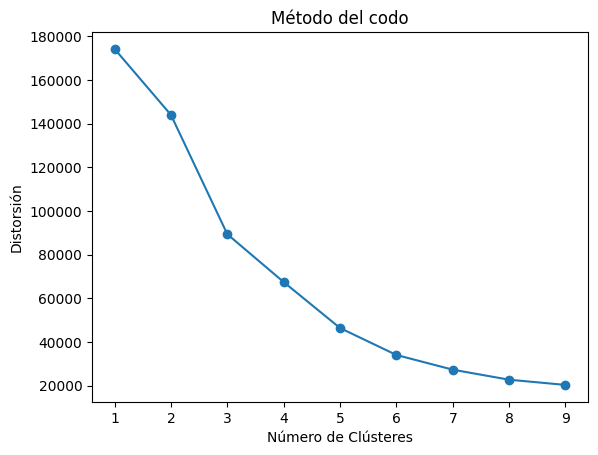

In [159]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fees_pca)  # O cashrequest_pca
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distorsión')
plt.show()


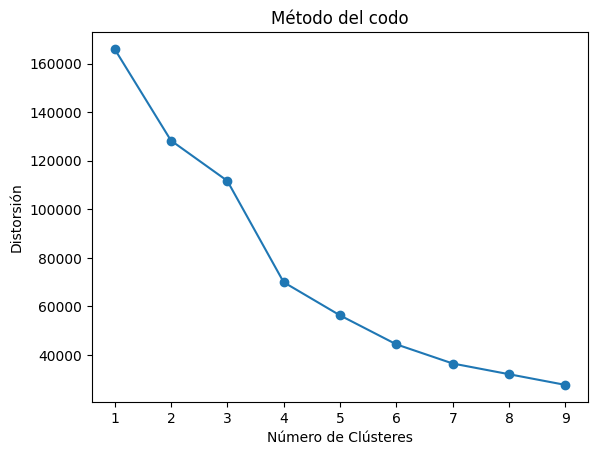

In [156]:
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cashrequest_pca)  # O cashrequest_pca
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('Distorsión')
plt.show()


**Visualización**

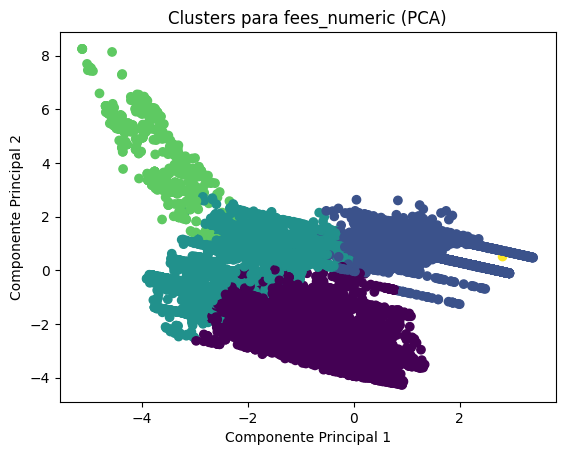

In [160]:
import matplotlib.pyplot as plt

plt.scatter(fees_pca[:, 0], fees_pca[:, 1], c=fees_clusters, cmap='viridis')
plt.title('Clusters para fees_numeric (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

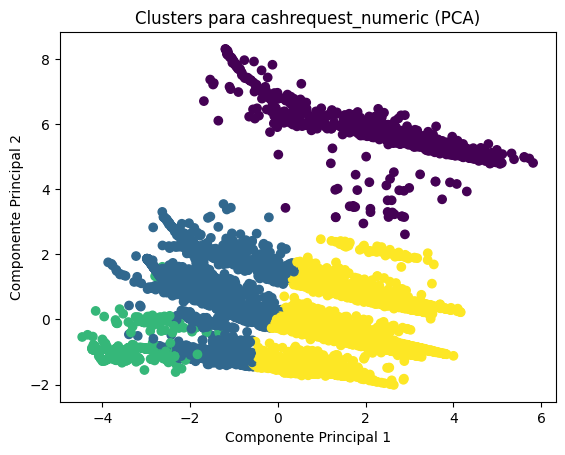

In [161]:
plt.scatter(cashrequest_pca[:, 0], cashrequest_pca[:, 1], c=cashrequest_clusters, cmap='viridis')
plt.title('Clusters para cashrequest_numeric (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()
